Plotting for Exploratory data analysis (EDA)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("/data_file/iris.csv")


In [ ]:
# (Q) how many data-points and features?
print("(data-points, features)")
print (iris.shape)

(data-points, features)
(150, 5)


In [ ]:
#(Q) What are the column names in our dataset?
print("\ncolumns name:")
print (iris.columns)


columns name:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?
print("\nData points per class:")
iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.


Data points per class:


versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [ ]:
print("Total number of class:",end= " ")
iris["species"].nunique()

Total number of class: 

3

# 2-D Scatter Plot

1.   List item
2.   List item



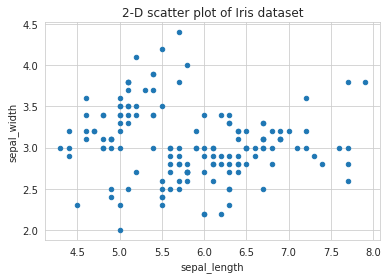

In [ ]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.title("2-D scatter plot of Iris dataset")
plt.grid("whitegrid")
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

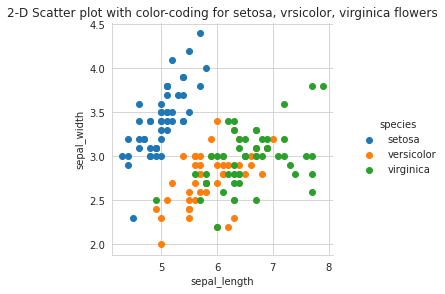

In [ ]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", height=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.title("2-D Scatter plot with color-coding for setosa, vrsicolor, virginica flowers")
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

# Pair-plot

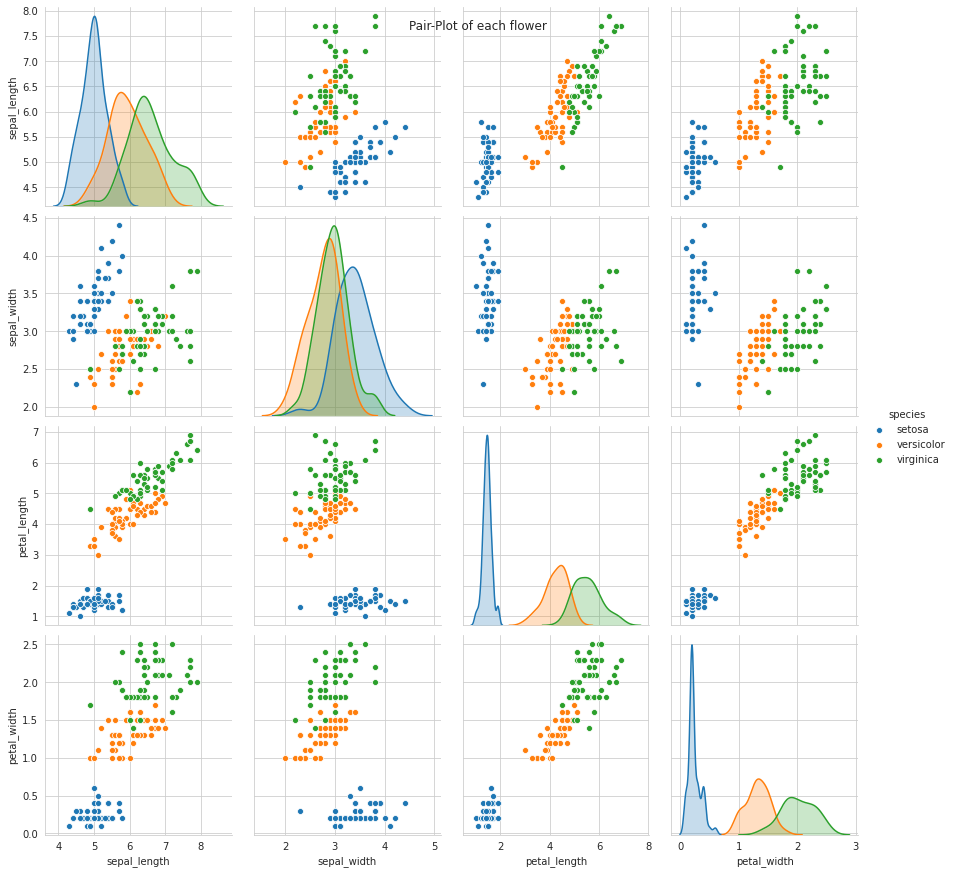

In [ ]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", height=3);
plt.suptitle('Pair-Plot of each flower')
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# Histogram, PDF, CDF

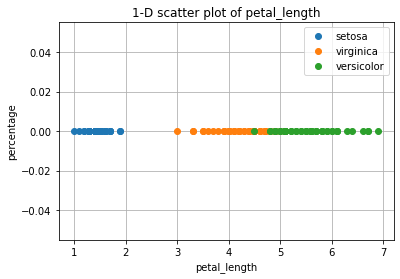

In [ ]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.title("1-D scatter plot of petal_length")
plt.xlabel("petal_length")
plt.ylabel("percentage")
plt.legend(["setosa","virginica","versicolor"])
plt.grid("whitegrid")
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

**Observations**

Using 1-D plot: It is Very hard to make sense as points .

Points are overlapping a lot.

Above plot doesn't show number of points (count of points) for each type.


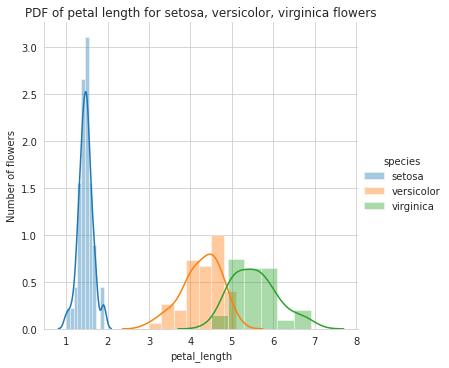

In [ ]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();

plt.title("PDF of petal length for setosa, versicolor, virginica flowers")
plt.ylabel("Number of flowers")
plt.show();

**Observations**

Using petal_length setosa is completely separated,

Also versicolor and virginica are separated, However both are overlapped in some extent.

PDF shows number of flowers in all species.

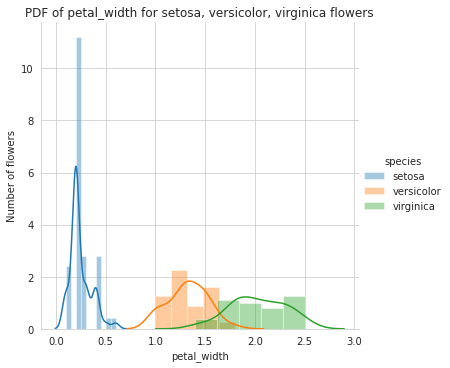

In [ ]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();

plt.title("PDF of petal_width for setosa, versicolor, virginica flowers")
plt.ylabel("Number of flowers");
plt.show();

**Observations**

Using petal_width setosa is completely separated,

Also versicolor and virginica are separated, However both are overlapped in some extent.

PDF shows number of flowers in all species.

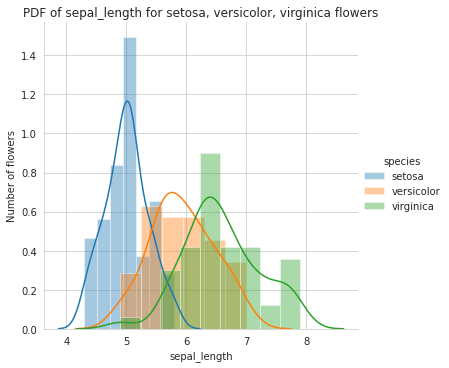

In [ ]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();

plt.title("PDF of sepal_length for setosa, versicolor, virginica flowers")
plt.ylabel("Number of flowers")
plt.show();

**Observations**

Using sepal_lenght, All species are overlapped.

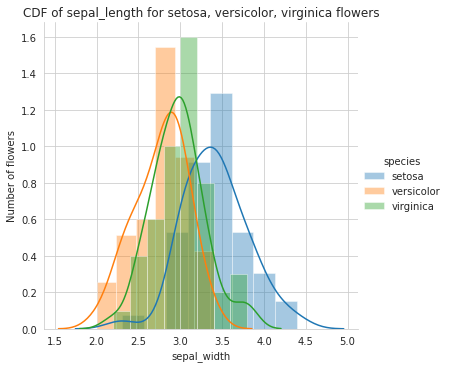

In [ ]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();

plt.title("CDF of sepal_length for setosa, versicolor, virginica flowers")
plt.ylabel("Number of flowers")
plt.show();

**Observations**

Using sepal_width, All species are overlapped.

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


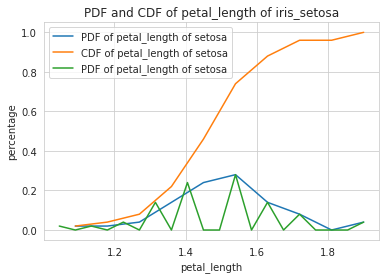

In [ ]:


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label="PDF of petal_length of setosa");

plt.plot(bin_edges[1:], cdf,label="CDF of petal_length of setosa");


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf,label="PDF of petal_length of setosa");

plt.title("PDF and CDF of petal_length of iris_setosa")
plt.xlabel("petal_length")
plt.ylabel("percentage")
plt.grid("whitegrid")
plt.legend()
plt.show();


**Observation**

 Using PDF, we can't say what percentage of setosa points have a petal_length of less than 1.6?

 Cumulative Distribution Function (CDF) is required to obtain perticular share percentage of setosa having petal_lenght of some value.

Here, CDF shows 82% of setosa flowers have petal_length less than 1.6

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


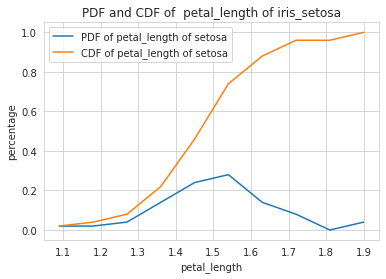

In [ ]:

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of petal_length of setosa");
plt.plot(bin_edges[1:], cdf,label="CDF of petal_length of setosa");

plt.title("PDF and CDF of  petal_length of iris_setosa")
plt.xlabel("petal_length")
plt.ylabel("percentage")
plt.grid("whitegrid")
plt.legend()
plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


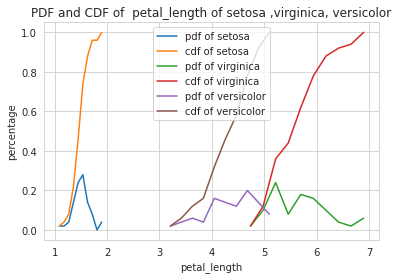

In [ ]:


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of setosa");
plt.plot(bin_edges[1:],cdf,label="cdf of setosa");


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of virginica");
plt.plot(bin_edges[1:], cdf,label="cdf of virginica");


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of versicolor");
plt.plot(bin_edges[1:], cdf,label="cdf of versicolor");

plt.title("PDF and CDF of  petal_length of setosa ,virginica, versicolor")
plt.xlabel("petal_length")
plt.ylabel("percentage")
plt.grid("whitegrid")
plt.legend(loc=9)
plt.show();

**Observation**

We can visually see around 82% percentage of versicolor flowers have a petal_length of less than 6

And, 97% of virginica flowers have petal_lenght of less than 4.7

And, 98% of setosa flowers have petal_length less than 1.8

# Mean, Variance and Std-dev

In [ ]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))





Means:
1.464
2.4156862745098038
5.552
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


**Observation**

By looking at means, virginica and vericolor are closure while mean of setosa is far from both of them.

When appending a single number or error(outlier) occured in setosa that could corrept mean.

By looking at std-dev, setosa has much thiner spread which means points of setosa are close to mean. But versicolor and verginica have wide spread so points of both are wide spreaded from their means.

# Median, Percentile, Quantile, IQR, MAD

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


**Observation**

The small number of error(outlier) points don't corrupt actual median.

If the more than 50% of points are erroneous then they can impact on median.

The median value is near by mean value except when it has extreme outlier point.

Median Absolute Deviation is approximately equal to std-dev.

# Box plot and Whiskers

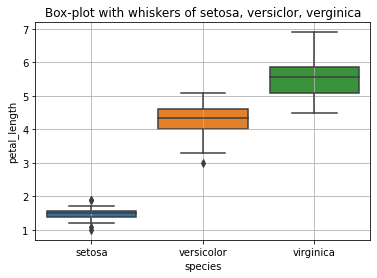

In [ ]:

sns.boxplot(x='species',y='petal_length', data=iris)
plt.title("Box-plot with whiskers of setosa, versiclor, verginica")
plt.grid("whitegrid")
plt.show()

**Observation**

The histogram says density about how many points exist in perticular range. But it doesn't show percentile.

The box plot shows percentile value for range of petal_lenght, e.g. 25th percentile, 50th percentile, 75th percentile.

Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles.

A segment inside the box shows the median and "whiskers" above and below the box show the locations of the minimum and maximum.

# Violin plots

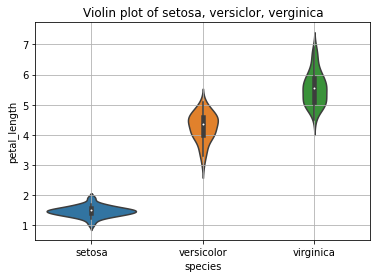

In [ ]:

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.title("Violin plot of setosa, versiclor, verginica")
plt.grid("whitegrid")
plt.show()

**Observation**

The violin plot is combination of probability density function and box plot.


# Summarizing plots in english
The objective is to classify flowers into their class setosa, verginica, versicolor.

The petal_length and petal_width are the most useful features to identify various flower types.

While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).

Using petal_length setosa is completely separated, Also versicolor and virginica are separated, However both are overlapped in narrow region.

# Univariate, bivariate and multivariate analysis.

In [ ]:
'''
Univariate means one variable with plot, e.g. PDF, CDF,boxplot and violin plot.
Bivariate means two variables with plot, e.g. 2-D scatter plot, pair plot.
Multivariate means three variables with plot, e.g. 3-D scatter plot.
'''
# These terms regarding number of variables.

'\nUnivariate means one variable with plot, e.g. PDF, CDF,boxplot and violin plot.\nBivariate means two variables with plot, e.g. 2-D scatter plot, pair plot.\nMultivariate means three variables with plot, e.g. 3-D scatter plot.\n'

# Multivariate probability density, contour plot.


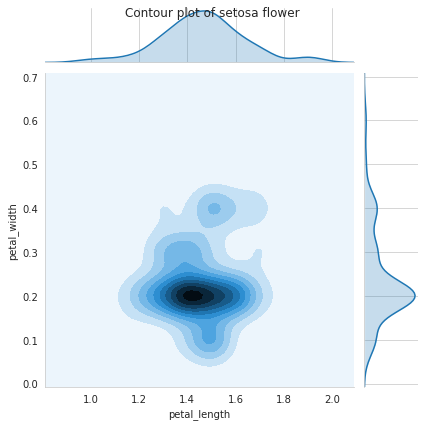

In [ ]:

sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.suptitle("Contour plot of setosa flower")
plt.show();


**Observation**

In contour plot, The Dark color shows more points are there, while light color shows less points.

# Exploratory Data Analysis on Haberman Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv("/data_file/haberman.csv")

haberman["status"].replace({1: "Long_Survival",2: "Short_Survival"}, inplace=True)
# (Q) how many data-points and features?
print("(data-points, features)")
print (haberman.shape)

#(Q) What are the column names in our dataset?
print("\ncolumns name:")
print (haberman.columns)

#(Q) How many data points for each class are present? 
print("\nData points per class")
haberman["status"].value_counts()

(data-points, features)
(306, 4)

columns name:
Index(['age', 'year', 'nodes', 'status'], dtype='object')

Data points per class


Long_Survival     225
Short_Survival     81
Name: status, dtype: int64

In [ ]:
print("Total number of class:",end= " ")
haberman["status"].nunique()

Total number of class: 

2

# 2-D Scatter Plot

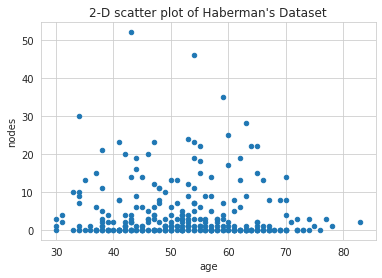

In [ ]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haberman.plot(kind='scatter', x='age', y='nodes') ;
plt.title("2-D scatter plot of Haberman's Dataset")
plt.show()

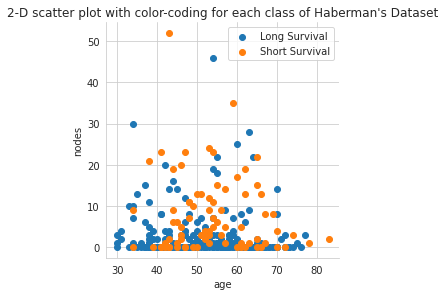

In [ ]:
# 2-D Scatter plot with color-coding for each class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes")

plt.title("2-D scatter plot with color-coding for each class of Haberman's Dataset")
plt.legend(["Long Survival","Short Survival"])
plt.show();

**Observation**

In the 2-D scatter plot, class label: long survival and short survival are not linearly seprable

# Pair-plot

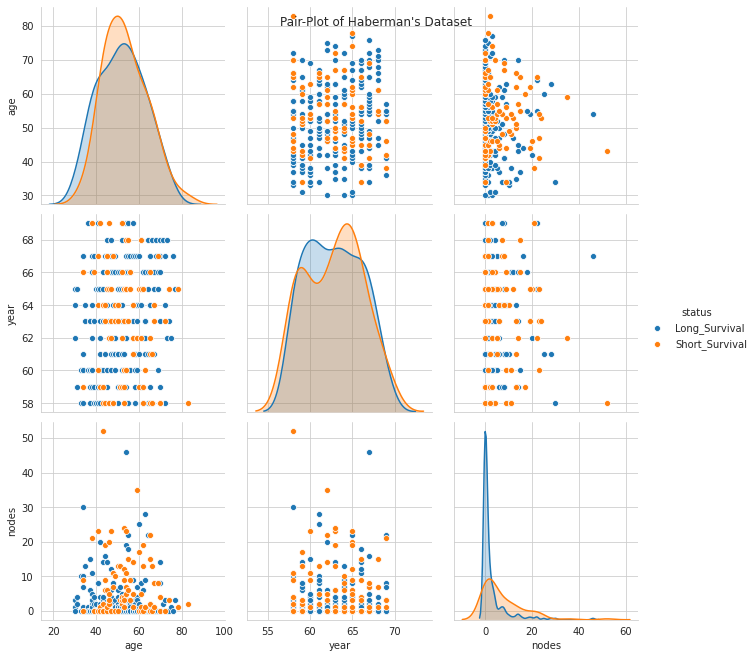

In [ ]:

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=3);
plt.suptitle("Pair-Plot of Haberman's Dataset")
# plt.legend(["Long Survival","Short Survival"])
plt.show()

**Observation**

In operation_year, 60-67 more person died in short survival who has less than 5 axillary lymph node.

However, this plot is not much useful in classification of person's died ratio.

# Histogram, PDF, CDF

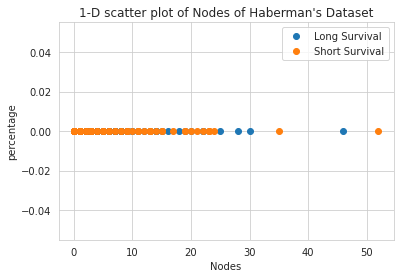

In [ ]:
import numpy as np
haberman_1 = haberman.loc[haberman["status"] == "Long_Survival"];
haberman_2 = haberman.loc[haberman["status"] == "Short_Survival"];

plt.plot(haberman_1['nodes'], np.zeros_like(haberman_1['nodes']), 'o')
plt.plot(haberman_2['nodes'], np.zeros_like(haberman_2['nodes']), 'o')

plt.grid("whitegrid")
plt.legend(["Long Survival","Short Survival"])
plt.title("1-D scatter plot of Nodes of Haberman's Dataset")
plt.xlabel("Nodes")
plt.ylabel("percentage")
plt.show()

**Observation**

After looking at this plot, we can say, the patient died ratio is high when axillary lymph node count is in between 1 to 25.

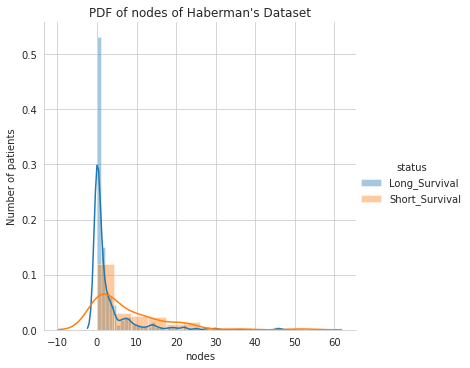

In [ ]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();

plt.title("PDF of nodes of Haberman's Dataset")
plt.ylabel("Number of patients")
plt.grid("whitegrid");
plt.show();

**Observation**

The plot shows, probabily people survived long who had number of node 1-3 , also people died as well in less percentage. 

The persons died in short survival who have nodes more than 3.

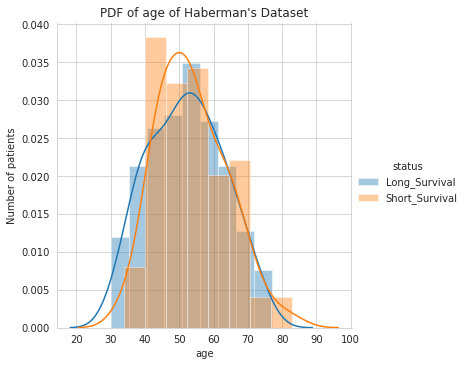

In [ ]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();

plt.title("PDF of age of Haberman's Dataset")
plt.ylabel("Number of patients")
plt.grid("whitegrid");
plt.show();

**Observation**


At the age range from 30–75 the status of survival and death is same.

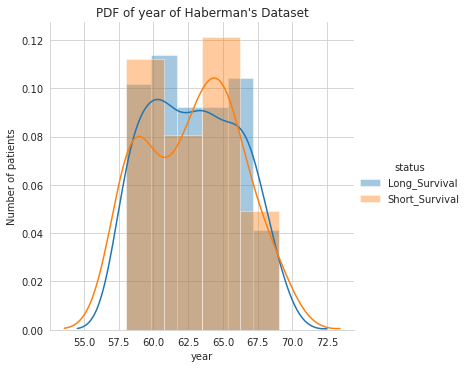

In [ ]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();

plt.title("PDF of year of Haberman's Dataset")
plt.ylabel("Number of patients")
plt.grid("whitegrid");
plt.show();

**Observation**

Here, The PDF of both classification overlap on each other.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


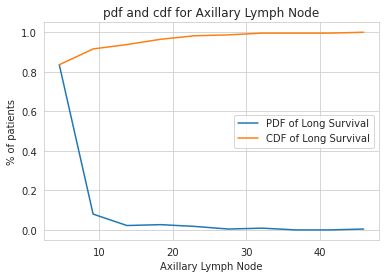

In [ ]:
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.grid("whitegrid")
plt.legend(["PDF of Long Survival","CDF of Long Survival"]);
plt.title("pdf and cdf for Axillary Lymph Node")
plt.xlabel("Axillary Lymph Node")
plt.ylabel("% of patients")

plt.show();

**Observation**

Here, The CDF shows there is a 85% chance of long survival if number of axillary nodes detected are less than 5.

And, 100% of people have less chances of survival if nodes are greater than 40.


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


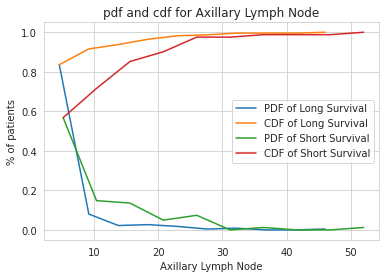

In [ ]:
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.legend(["PDF of Long Survival","CDF of Long Survival","PDF of Short Survival","CDF of Short Survival"]);
plt.title("pdf and cdf for Axillary Lymph Node")
plt.xlabel("Axillary Lymph Node")
plt.ylabel("% of patients")
plt.grid("whitegrid")
plt.show();

**Observation**


The person who has more than 45 nodes that is not survived.

The person who has more than 3 node and less than 25 that person has short survival chance.

The person who has less than 3 node such person has long servival.


# Mean, Variance and Std-dev

In [ ]:
print("Means:")
print(np.mean(haberman_1["nodes"]))
print(np.mean(haberman_2["nodes"]))

print("\nStd-dev:");
print(np.std(haberman_1["nodes"]))
print(np.std(haberman_2["nodes"]))

Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


**Observation**

Long survive mean is 2.79, but the mean of Short survive is 7.4 which is comparatively much higher than Long survive.

Long survive has standard deviation of only 5.85 and Short survive has 9.12, means the spread of data for short survive is more.


# Median, Percentile, Quantile, MAD

In [ ]:
print("\nMedians:")
print(np.median(haberman_1["nodes"]))
print(np.median(haberman_2["nodes"]))

print("\nQuantiles:")
print(np.percentile(haberman_1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["nodes"],np.arange(0, 100, 25)))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["nodes"]))
print(robust.mad(haberman_2["nodes"]))


Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Median Absolute Deviation
0.0
5.930408874022408


**Observation**

In long survival, 50th% person having axillary nodes are 0 and 75th% of patients have nodes less than 3.

In short survival 75th% of patients have minimum 11 nodes detected.


# Box plot and Whiskers

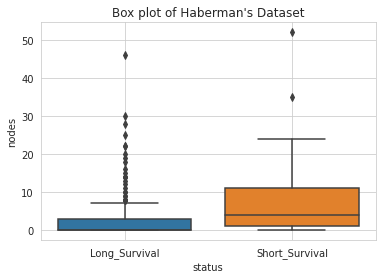

In [ ]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title("Box plot of Haberman's Dataset")
plt.grid("whitegrid")
plt.show()

**Observation**

The Box whiskers 25th percentile and 50th percentile are nearly same for Long survive and threshold for it is 0 to 7.

Also, for short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile. Threshold for the Short survival is 0 to 25 nodes and 75th% is 11 and 25th% is 1 to 3.


# (3.12.8) Violin plots

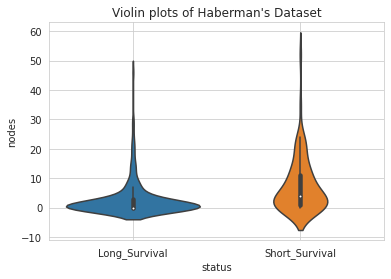

In [ ]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title("Violin plots of Haberman's Dataset")
plt.grid("whitegrid")
plt.show()

**Observation**

For long survival it is more near the 0 nodes and also it has whiskers in range 0-7

In violin 2, it shows the short survival density more from 0–20

# Multivariate probability density, contour plot.

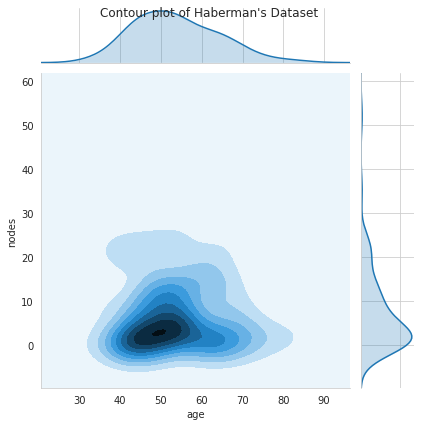

In [ ]:
sns.jointplot(x="age", y="nodes", data=haberman_2, kind="kde");
plt.suptitle("Contour plot of Haberman's Dataset")
plt.grid("whitegrid")
plt.show();

**Observation**

The density for short survival is more from age range 45–55 and axillary nodes from 0–3. 

The dark area have major density.

# Summary of plots

The objective is to classify a patient survival data into long survival and short survival who had undergone surgery of cancer.

The given dataset is not linearly seprable from each class. 

There are too much overlapping in the data-points and hence it is very diffucult to classify.

The nodes are giving some information in some extent. But that is not sufficient.